<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-real-time-bus-tracker" data-toc-modified-id="A-real-time-bus-tracker-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A real-time bus tracker</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Playing-with-time" data-toc-modified-id="Playing-with-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Playing with time</a></span></li><li><span><a href="#Import-data-from-metro-API" data-toc-modified-id="Import-data-from-metro-API-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import data from metro API</a></span><ul class="toc-item"><li><span><a href="#Get-real-time-bus-locations-via-url-call" data-toc-modified-id="Get-real-time-bus-locations-via-url-call-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Get real-time bus locations via url call</a></span></li><li><span><a href="#Convert-JSON-to-dataframe-and-add-a-timestamp" data-toc-modified-id="Convert-JSON-to-dataframe-and-add-a-timestamp-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Convert JSON to dataframe and add a timestamp</a></span></li><li><span><a href="#Adjust-the-time" data-toc-modified-id="Adjust-the-time-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Adjust the time</a></span></li><li><span><a href="#Create-an-empty-csv-file" data-toc-modified-id="Create-an-empty-csv-file-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Create an empty csv file</a></span></li><li><span><a href="#Append-data-to-csv" data-toc-modified-id="Append-data-to-csv-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Append data to csv</a></span></li></ul></li><li><span><a href="#Making-it-into-a-function" data-toc-modified-id="Making-it-into-a-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Making it into a function</a></span></li><li><span><a href="#In-class-exercise" data-toc-modified-id="In-class-exercise-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>In class exercise</a></span></li><li><span><a href="#Automate-it" data-toc-modified-id="Automate-it-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Automate it</a></span></li><li><span><a href="#Map-it" data-toc-modified-id="Map-it-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Map it</a></span><ul class="toc-item"><li><span><a href="#Plotly" data-toc-modified-id="Plotly-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Plotly</a></span></li><li><span><a href="#Kepler" data-toc-modified-id="Kepler-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Kepler</a></span></li></ul></li></ul></li></ul></div>

<div class="alert alert-danger">
This lab will be recorded.
</div>

# A real-time bus tracker

<img src='images/buses.gif' width=400>

The LA Metro API provides information on the exact location of buses that are currently in operation. Using this real-time bus data, we can generate maps that display the location of buses for any given route. Furthermore, we can utilize this feed to create an archive of bus location associated with their timestamps. By creating a script that continously collects this information, we can simulate bus movement in the city for further analysis.

## Import libraries

In [1]:
# libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# to import and manipulate api/json data
import urllib.request 
import json

# to manipulate csv files
import csv
from csv import DictWriter

# to work with time
import datetime as dt
from datetime import datetime
import pytz
from pytz import timezone

## Playing with time

<img src='images/World_Time_Zones_Map.png' width=800>

[[Source: Wikimedia](https://upload.wikimedia.org/wikipedia/commons/8/88/World_Time_Zones_Map.png)]

Time is not the easiest thing to work with in Python, or for that matter, any coding language. There are surprisingly many complications (e.g. date/time datatypes, date/time display formats, timezones, etc) that make it difficult to work with. Below are some of the very basic constructs of the datetime library, along with the [pytz](https://pythonhosted.org/pytz/) library that allows you to define timezones.

Time formats as strings:

- https://docs.python.org/3/library/time.html#time.strftime
    

In [2]:
# giving the format of datetime
format = "%Y-%m-%d %H:%M:%S %Z%z"

# getting the current time in UTC timezone
now_utc = datetime.now(timezone('UTC'))

# Format the above DateTime using the strftime()
print('Current Time in UTC TimeZone:',now_utc.strftime(format))

# Converting to Asia/Tokyo time zone
now_tokyo = now_utc.astimezone(timezone('Asia/Tokyo'))

# Format the above datetime using the strftime()
print('Current Time in Asia/Tokyo TimeZone:',now_tokyo.strftime(format))

Current Time in UTC TimeZone: 2023-03-13 11:20:39 UTC+0000
Current Time in Asia/Tokyo TimeZone: 2023-03-13 20:20:39 JST+0900


In [3]:
# what are the valid timezones?
for tz in pytz.all_timezones:
    print(tz)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

In [4]:
# Using the logic above, output the time in LA right now



In [5]:
# How about other time formats, and/or timezones from around the world?



# Import data from metro API

![metro](https://i0.wp.com/brand.metro.net/wp-content/uploads/2018/08/metro-logo-preferred-e1543619521338.png?h=75)

- https://api.metro.net/

### Get real-time bus locations via url call

Note that the metro data is provided by our hardworking alumni friend Albert!

- https://api.metro.net/LACMTA/vehicle_positions/route_code/20?geojson=true

![Alt text](images/albert%20and%20yoh%20texts.png)

In [6]:
# metro line to scrape
line = 4

# get the data in geojson format
gdf = gpd.read_file('https://api.metro.net/LACMTA/vehicle_positions/route_code/'+str(line)+'?geojson=true')


<AxesSubplot: >

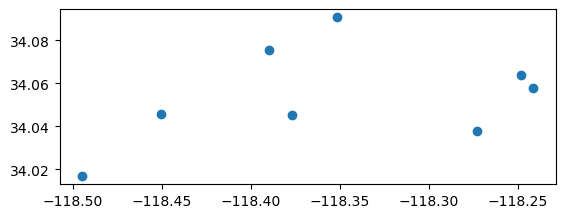

In [7]:
gdf.plot()

### Converting JSON to columns and converting unix timestamps
Some of the data fields are in ```json``` format, or ```dictionaries``` if we were to use python lingo. We need to "explode" these into separate columns. For example, to explode the "trip" column:

In [8]:
gdf.head()

,trip,vehicle,position,current_status,geometry
0,"{'trip_id': '70004003312716-DEC22', 'route_id'...","{'vehicle_id': '9502', 'vehicle_label': '9502'}","{'latitude': 34.064090728759766, 'longitude': ...",IN_TRANSIT_TO,POINT (-118.24813 34.06409)
1,"{'trip_id': '10004003410406-DEC22', 'route_id'...","{'vehicle_id': '9525', 'vehicle_label': '9525'}","{'latitude': 34.05773162841797, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.24138 34.05773)
2,"{'trip_id': '70004003312748-DEC22', 'route_id'...","{'vehicle_id': '9583', 'vehicle_label': '9583'}","{'latitude': 34.07548522949219, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.38973 34.07549)
3,"{'trip_id': '70004003382737-DEC22', 'route_id'...","{'vehicle_id': '8718', 'vehicle_label': '8718'}","{'latitude': 34.090816497802734, 'longitude': ...",IN_TRANSIT_TO,POINT (-118.35161 34.09082)
4,"{'trip_id': '70004003312818-DEC22', 'route_id'...","{'vehicle_id': '8723', 'vehicle_label': '8723'}","{'latitude': 34.01670455932617, 'longitude': -...",STOPPED_AT,POINT (-118.49478 34.01670)


In [9]:
# "explode" trip json data in trip column to separate columns
gdf = pd.concat([gdf, gdf["trip"].apply(pd.Series)], axis=1)
gdf

,trip,vehicle,position,current_status,geometry,trip_id,route_id,trip_start_date
0,"{'trip_id': '70004003312716-DEC22', 'route_id'...","{'vehicle_id': '9502', 'vehicle_label': '9502'}","{'latitude': 34.064090728759766, 'longitude': ...",IN_TRANSIT_TO,POINT (-118.24813 34.06409),70004003312716-DEC22,4-13167,20230313
1,"{'trip_id': '10004003410406-DEC22', 'route_id'...","{'vehicle_id': '9525', 'vehicle_label': '9525'}","{'latitude': 34.05773162841797, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.24138 34.05773),10004003410406-DEC22,4-13167,20230313
2,"{'trip_id': '70004003312748-DEC22', 'route_id'...","{'vehicle_id': '9583', 'vehicle_label': '9583'}","{'latitude': 34.07548522949219, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.38973 34.07549),70004003312748-DEC22,4-13167,20230313
3,"{'trip_id': '70004003382737-DEC22', 'route_id'...","{'vehicle_id': '8718', 'vehicle_label': '8718'}","{'latitude': 34.090816497802734, 'longitude': ...",IN_TRANSIT_TO,POINT (-118.35161 34.09082),70004003382737-DEC22,4-13167,20230313
4,"{'trip_id': '70004003312818-DEC22', 'route_id'...","{'vehicle_id': '8723', 'vehicle_label': '8723'}","{'latitude': 34.01670455932617, 'longitude': -...",STOPPED_AT,POINT (-118.49478 34.01670),70004003312818-DEC22,4-13167,20230313
5,"{'trip_id': '10004003230437-DEC22', 'route_id'...","{'vehicle_id': '8809', 'vehicle_label': '8809'}","{'latitude': 34.04519271850586, 'longitude': -...",STOPPED_AT,POINT (-118.37679 34.04519),10004003230437-DEC22,4-13167,20230313
6,"{'trip_id': '70004003392704-DEC22', 'route_id'...","{'vehicle_id': '8800', 'vehicle_label': '8800'}","{'latitude': 34.04593276977539, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.45071 34.04593),70004003392704-DEC22,4-13167,20230313
7,"{'trip_id': '10004003400433-DEC22', 'route_id'...","{'vehicle_id': '8834', 'vehicle_label': '8834'}","{'latitude': 34.03764343261719, 'longitude': -...",STOPPED_AT,POINT (-118.27297 34.03764),10004003400433-DEC22,4-13167,20230313


Now, repeat for ```vehicle``` and ```position``` columns:

In [10]:
gdf = pd.concat([gdf, gdf["vehicle"].apply(pd.Series)], axis=1)
gdf = pd.concat([gdf, gdf["position"].apply(pd.Series)], axis=1)
gdf

,trip,vehicle,position,current_status,geometry,trip_id,route_id,trip_start_date,vehicle_id,vehicle_label,latitude,longitude,bearing,timestamp,speed
0,"{'trip_id': '70004003312716-DEC22', 'route_id'...","{'vehicle_id': '9502', 'vehicle_label': '9502'}","{'latitude': 34.064090728759766, 'longitude': ...",IN_TRANSIT_TO,POINT (-118.24813 34.06409),70004003312716-DEC22,4-13167,20230313,9502,9502,34.064091,-118.248131,135.498047,1.678706e+09,17.702784
1,"{'trip_id': '10004003410406-DEC22', 'route_id'...","{'vehicle_id': '9525', 'vehicle_label': '9525'}","{'latitude': 34.05773162841797, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.24138 34.05773),10004003410406-DEC22,4-13167,20230313,9525,9525,34.057732,-118.241379,58.803864,1.678706e+09,13.411200
2,"{'trip_id': '70004003312748-DEC22', 'route_id'...","{'vehicle_id': '9583', 'vehicle_label': '9583'}","{'latitude': 34.07548522949219, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.38973 34.07549),70004003312748-DEC22,4-13167,20230313,9583,9583,34.075485,-118.389732,50.253380,1.678706e+09,8.404351
3,"{'trip_id': '70004003382737-DEC22', 'route_id'...","{'vehicle_id': '8718', 'vehicle_label': '8718'}","{'latitude': 34.090816497802734, 'longitude': ...",IN_TRANSIT_TO,POINT (-118.35161 34.09082),70004003382737-DEC22,4-13167,20230313,8718,8718,34.090816,-118.351608,270.399628,1.678706e+09,12.070080
4,"{'trip_id': '70004003312818-DEC22', 'route_id'...","{'vehicle_id': '8723', 'vehicle_label': '8723'}","{'latitude': 34.01670455932617, 'longitude': -...",STOPPED_AT,POINT (-118.49478 34.01670),70004003312818-DEC22,4-13167,20230313,8723,8723,34.016705,-118.494781,46.463627,1.678706e+09,0.044704
5,"{'trip_id': '10004003230437-DEC22', 'route_id'...","{'vehicle_id': '8809', 'vehicle_label': '8809'}","{'latitude': 34.04519271850586, 'longitude': -...",STOPPED_AT,POINT (-118.37679 34.04519),10004003230437-DEC22,4-13167,20230313,8809,8809,34.045193,-118.376785,180.000000,1.678706e+09,2.682240
6,"{'trip_id': '70004003392704-DEC22', 'route_id'...","{'vehicle_id': '8800', 'vehicle_label': '8800'}","{'latitude': 34.04593276977539, 'longitude': -...",IN_TRANSIT_TO,POINT (-118.45071 34.04593),70004003392704-DEC22,4-13167,20230313,8800,8800,34.045933,-118.450714,251.884689,1.678706e+09,3.621024
7,"{'trip_id': '10004003400433-DEC22', 'route_id'...","{'vehicle_id': '8834', 'vehicle_label': '8834'}","{'latitude': 34.03764343261719, 'longitude': -...",STOPPED_AT,POINT (-118.27297 34.03764),10004003400433-DEC22,4-13167,20230313,8834,8834,34.037643,-118.272972,109.000000,1.678706e+09,21.636736


In [11]:
# drop unncessary columns
gdf = gdf.drop(columns=['trip','vehicle','position','trip_id','trip_start_date','vehicle_label'])
gdf

,current_status,geometry,route_id,vehicle_id,latitude,longitude,bearing,timestamp,speed
0,IN_TRANSIT_TO,POINT (-118.24813 34.06409),4-13167,9502,34.064091,-118.248131,135.498047,1.678706e+09,17.702784
1,IN_TRANSIT_TO,POINT (-118.24138 34.05773),4-13167,9525,34.057732,-118.241379,58.803864,1.678706e+09,13.411200
2,IN_TRANSIT_TO,POINT (-118.38973 34.07549),4-13167,9583,34.075485,-118.389732,50.253380,1.678706e+09,8.404351
3,IN_TRANSIT_TO,POINT (-118.35161 34.09082),4-13167,8718,34.090816,-118.351608,270.399628,1.678706e+09,12.070080
4,STOPPED_AT,POINT (-118.49478 34.01670),4-13167,8723,34.016705,-118.494781,46.463627,1.678706e+09,0.044704
5,STOPPED_AT,POINT (-118.37679 34.04519),4-13167,8809,34.045193,-118.376785,180.000000,1.678706e+09,2.682240
6,IN_TRANSIT_TO,POINT (-118.45071 34.04593),4-13167,8800,34.045933,-118.450714,251.884689,1.678706e+09,3.621024
7,STOPPED_AT,POINT (-118.27297 34.03764),4-13167,8834,34.037643,-118.272972,109.000000,1.678706e+09,21.636736


### Converting timestamps

Whoa, what's up with the timestamp column? Does anybody recognize this time format?

In [12]:
gdf['timestamp']

0    1.678706e+09
1    1.678706e+09
2    1.678706e+09
3    1.678706e+09
4    1.678706e+09
5    1.678706e+09
6    1.678706e+09
7    1.678706e+09
Name: timestamp, dtype: float64

In [13]:
# convert unix timestamp to human readable time
gdf['time'] = pd.to_datetime(gdf['timestamp'],unit='s')
gdf

,current_status,geometry,route_id,vehicle_id,latitude,longitude,bearing,timestamp,speed,time
0,IN_TRANSIT_TO,POINT (-118.24813 34.06409),4-13167,9502,34.064091,-118.248131,135.498047,1.678706e+09,17.702784,2023-03-13 11:20:27
1,IN_TRANSIT_TO,POINT (-118.24138 34.05773),4-13167,9525,34.057732,-118.241379,58.803864,1.678706e+09,13.411200,2023-03-13 11:18:46
2,IN_TRANSIT_TO,POINT (-118.38973 34.07549),4-13167,9583,34.075485,-118.389732,50.253380,1.678706e+09,8.404351,2023-03-13 11:20:28
3,IN_TRANSIT_TO,POINT (-118.35161 34.09082),4-13167,8718,34.090816,-118.351608,270.399628,1.678706e+09,12.070080,2023-03-13 11:19:33
4,STOPPED_AT,POINT (-118.49478 34.01670),4-13167,8723,34.016705,-118.494781,46.463627,1.678706e+09,0.044704,2023-03-13 11:20:29
5,STOPPED_AT,POINT (-118.37679 34.04519),4-13167,8809,34.045193,-118.376785,180.000000,1.678706e+09,2.682240,2023-03-13 11:18:06
6,IN_TRANSIT_TO,POINT (-118.45071 34.04593),4-13167,8800,34.045933,-118.450714,251.884689,1.678706e+09,3.621024,2023-03-13 11:20:30
7,STOPPED_AT,POINT (-118.27297 34.03764),4-13167,8834,34.037643,-118.272972,109.000000,1.678706e+09,21.636736,2023-03-13 11:20:26


In [14]:
# convert utc time to Los Angeles time
gdf['time'] = gdf['time'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
gdf.head()

,current_status,geometry,route_id,vehicle_id,latitude,longitude,bearing,timestamp,speed,time
0,IN_TRANSIT_TO,POINT (-118.24813 34.06409),4-13167,9502,34.064091,-118.248131,135.498047,1.678706e+09,17.702784,2023-03-13 04:20:27-07:00
1,IN_TRANSIT_TO,POINT (-118.24138 34.05773),4-13167,9525,34.057732,-118.241379,58.803864,1.678706e+09,13.411200,2023-03-13 04:18:46-07:00
2,IN_TRANSIT_TO,POINT (-118.38973 34.07549),4-13167,9583,34.075485,-118.389732,50.253380,1.678706e+09,8.404351,2023-03-13 04:20:28-07:00
3,IN_TRANSIT_TO,POINT (-118.35161 34.09082),4-13167,8718,34.090816,-118.351608,270.399628,1.678706e+09,12.070080,2023-03-13 04:19:33-07:00
4,STOPPED_AT,POINT (-118.49478 34.01670),4-13167,8723,34.016705,-118.494781,46.463627,1.678706e+09,0.044704,2023-03-13 04:20:29-07:00


### Create an empty csv file
While we can save the metro data to a dataframe, let us also simultaneously save the data in a .csv file. The .csv file will allow the file to live outside of this jupyter notebook.

Python allows you to "write," or create a new csv file to your directory.

- https://docs.python.org/3/library/csv.html

We first create an empty csv file with the headers from our metro data feed.

In [15]:
# name of csv file  
filename = "bus.csv"
    
# field names to use as headers
fields = list(gdf)

fields

['current_status',
 'geometry',
 'route_id',
 'vehicle_id',
 'latitude',
 'longitude',
 'bearing',
 'timestamp',
 'speed',
 'time']

In [16]:
# write/create a new csv file ('w') 
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  

You should now see a new file `bus.csv` in your file directory. Check to make sure!

### Append data to csv

Check your JupyterHub file space and confirm that the file `bus.csv` has been created. Now, we will append the dataframe to the csv file.

In [17]:
# Open your CSV file in append mode ('a')
with open('bus.csv', 'a') as busfile: 
      
    # create a dictionary writer
    dictwriter = DictWriter(busfile, fieldnames=fields) 

    # loop through each row and add it to the csv file
    for index, row in gdf.iterrows():
        #Pass the dictionary as an argument to the writerow() 
        dictwriter.writerow(row.to_dict()) 
  
    #Close the file object 
    busfile.close()

You csv file has been baked! Double click the file from your directory and confirm that the bus data is there (you might have to close your file once and reopen to see the changes)

## Making it into a function

We have now reviewed the entire workflow to do the following:

- call the metro API and retrieve the location of "live" buses on a given route
- convert the json data to a dataframe
- create a timestamp for the data and adjust the timezone for Los Angeles
- create a csv file of our data

Next, let's create a function that does all of the above, which will allow us to automate the retrieval of bus data at given time intervals.

## In class exercise

- create a function `scrape_metro()` that accepts an argument for `line` (with the default being `line = '2'`
- add all the relevant steps (as shown in the code cells above) that produces the csv file with the adjusted timestamp
- in another cell, run the function `scrape_metro()`
- open the `bus.csv` file to make sure new rows have been added

Perform these steps in the cells below. DO NOT SCROLL DOWN UNTIL YOU ARE DONE! The answers are below :)

In [18]:
def scrape_metro(line=4):
    # metro line to scrape
    line = line

    # api url for metro stops
    # url = 'https://api.metro.net/agencies/lametro/routes/'+str(line)+'/vehicles/'

    gdf = gpd.read_file('https://api.metro.net/LACMTA/vehicle_positions/route_code/'+str(line)+'?geojson=true')

    gdf = pd.concat([gdf, gdf["trip"].apply(pd.Series)], axis=1)
    gdf = pd.concat([gdf, gdf["vehicle"].apply(pd.Series)], axis=1)
    gdf = pd.concat([gdf, gdf["position"].apply(pd.Series)], axis=1)

    # drop columns
    gdf = gdf.drop(columns=['trip','vehicle','position','vehicle_label','trip_id','trip_start_date'])

    gdf['time'] = pd.to_datetime(gdf['timestamp'],unit='s')

    # convert utc time to Los Angeles time
    gdf['time'] = gdf['time'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
    
    # Open your CSV file in append mode ('a')
    with open('bus.csv', 'a') as busfile: 
        
        # create a dictionary writer
        dictwriter = DictWriter(busfile, fieldnames=fields) 

        # loop through each row and add it to the csv file
        for index, row in gdf.iterrows():
            #Pass the dictionary as an argument to the writerow() 
            dictwriter.writerow(row.to_dict()) 
    
        #Close the file object 
        busfile.close()

In [19]:
# test the function
scrape_metro()

Check the file bus.csv!

## Automate it

The beauty of coding is that we can automate our code. The following code cell uses the `time` library, along with a `while` loop to run our function every 10 seconds, 10 times. Of course, these numbers can be modified as you wish.

First, recreate the `bus.csv` file:

In [20]:
# write/create a new csv file ('w') 
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  

Next, run the while loop:

In [21]:
import time

# set a counter
i = 1

# how many times to run
runtimes = 30

# run every x seconds
rest = 10

# start message
print('Starting metro scraper, once every '+str(rest)+' seconds for '+str(runtimes)+' iterations...')

# start the loop
while i <= runtimes:
    # timestamp to print out
    now = datetime.now(timezone('US/Pacific'))
    now = now.strftime('%Y-%m-%d %H:%M:%S')

    print(str(i) + ': ' + now)
    scrape_metro()
    i += 1
    
    # run this every x seconds
    time.sleep(rest)

Starting metro scraper, once every 10 seconds for 30 iterations...
1: 2023-03-13 04:22:13


If you see 10 lines above, you're done! Now, put the csv file into a dataframe:

In [22]:
# put data into dataframe
df = pd.read_csv('bus.csv')

In [23]:
# check the data
df.shape

(40, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   current_status  40 non-null     object 
 1   geometry        40 non-null     object 
 2   route_id        40 non-null     object 
 3   vehicle_id      40 non-null     int64  
 4   latitude        40 non-null     float64
 5   longitude       40 non-null     float64
 6   bearing         40 non-null     float64
 7   timestamp       40 non-null     float64
 8   speed           39 non-null     float64
 9   time            40 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.2+ KB


In [25]:
df

,current_status,geometry,route_id,vehicle_id,latitude,longitude,bearing,timestamp,speed,time
0,STOPPED_AT,POINT (-118.28153991699219 34.011295318603516),2-13167,8529,34.011295,-118.281540,178.000000,1.678706e+09,NaN,2023-03-13 04:09:20-07:00
1,STOPPED_AT,POINT (-118.27973937988281 34.051841735839844),2-13167,3869,34.051842,-118.279739,27.872110,1.678706e+09,7.778496,2023-03-13 04:09:19-07:00
2,STOPPED_AT,POINT (-118.44808197021484 34.06409454345703),2-13167,5766,34.064095,-118.448082,87.094864,1.678706e+09,0.044704,2023-03-13 04:09:17-07:00
3,STOPPED_AT,POINT (-118.30073547363281 34.09806442260742),2-13167,8429,34.098064,-118.300735,89.893234,1.678706e+09,0.044704,2023-03-13 04:09:18-07:00
4,STOPPED_AT,POINT (-118.27938079833984 34.011104583740234),2-13167,8529,34.011105,-118.279381,87.000000,1.678706e+09,12.025375,2023-03-13 04:10:30-07:00
5,IN_TRANSIT_TO,POINT (-118.27765655517578 34.055137634277344),2-13167,3869,34.055138,-118.277657,27.780661,1.678706e+09,9.879584,2023-03-13 04:10:29-07:00
6,STOPPED_AT,POINT (-118.44808197021484 34.06409454345703),2-13167,5766,34.064095,-118.448082,87.094864,1.678706e+09,0.089408,2023-03-13 04:10:27-07:00
7,IN_TRANSIT_TO,POINT (-118.2945556640625 34.09811782836914),2-13167,8429,34.098118,-118.294556,89.760025,1.678706e+09,10.773664,2023-03-13 04:10:28-07:00
8,STOPPED_AT,POINT (-118.27938079833984 34.011104583740234),2-13167,8529,34.011105,-118.279381,87.000000,1.678706e+09,12.025375,2023-03-13 04:10:30-07:00
9,IN_TRANSIT_TO,POINT (-118.27765655517578 34.055137634277344),2-13167,3869,34.055138,-118.277657,27.780661,1.678706e+09,9.879584,2023-03-13 04:10:29-07:00


## Map it

### Plotly

In [26]:
# convert the id to a string so that plotly recognizes it as a categorical field
df['vehicle_id'] = df['vehicle_id'].astype(str)

In [30]:
fig = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        mapbox_style="carto-positron",
                        color= 'vehicle_id',
                        zoom=10,
                       )
fig.show()

### Kepler

In [35]:
from keplergl import KeplerGl

In [36]:
# create the kepler map (feeding it a config file so that it visualizes it based on prior settings)
map = KeplerGl(height=600,width=800,config={
  "version": "v1",
  "config": {
    "visState": {
      "filters": [
        {
          "dataId": [
            "bus"
          ],
          "id": "yzpt6frz3",
          "name": [
            "time"
          ],
          "type": "timeRange",
          "value": [
            1612886276000,
            1612886287999.9995
          ],
          "enlarged": True,
          "plotType": "histogram",
          "yAxis": None
        }
      ],
      "layers": [
        {
          "id": "x9vz60j",
          "type": "point",
          "config": {
            "dataId": "bus",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "latitude",
              "lng": "longitude",
              "altitude": None
            },
            "isVisible": True,
            "visConfig": {
              "radius": 20.1,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "ColorBrewer Set1-6",
                "type": "qualitative",
                "category": "ColorBrewer",
                "colors": [
                  "#e41a1c",
                  "#377eb8",
                  "#4daf4a",
                  "#984ea3",
                  "#ff7f00",
                  "#ffff33"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "vehicle_id",
              "type": "integer"
            },
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "bus": [
              {
                "name": "route_id",
                "format": None
              },
              {
                "name": "heading",
                "format": None
              },
              {
                "name": "id",
                "format": None
              },
              {
                "name": "predictable",
                "format": None
              },
              {
                "name": "seconds_since_report",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 17.204081632653057,
      "dragRotate": True,
      "latitude": 34.03641872791707,
      "longitude": -118.3557812310633,
      "pitch": 51.96682037600022,
      "zoom": 11.451941083083048,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [37]:
# show the map
map.add_data(data=df,name='bus')
map

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['bus'], 'id': 'yzpt6frz3', '…

Now it's your turn. Create map visualizations of other routes that Metro operates. 